In [4]:
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import requests

driver = webdriver.PhantomJS('/Users/cyian/Desktop/NYU/FALL2017/DS-GA1007/Project/phantomjs/bin/phantomjs')
#driver = webdriver.PhantomJS('/mnt/d/Academic/Nyu/DS1007/project/phantomjs.exe')

In [17]:
#Bitfinex data
def getBitfinex():
    driver.get('https://www.bitfinex.com/stats')
    time.sleep(0.1)
    html = driver.page_source

    soup = BeautifulSoup(html, "lxml")
    lines = soup.findAll('tr')
    flag = 0
    for dl in lines:
        if flag == 1:
            break
        cols = dl.find_all('td', {"class":  'col-info'})
        for col in cols:
            if col.get_text() == 'BTC/USD':
                btc_pl = dl.find('td', {"class":  'col-currency'})
                btc_price = float(btc_pl.get_text())
                flag = 1
                #import pdb; pdb.set_trace()
                break
    return btc_price
#print(btc_price)


10880.0


In [18]:
#Bittrex 
def getBittrex():
    driver.get('https://bittrex.com/home/markets')
    time.sleep(3)
    html = driver.page_source

    soup = BeautifulSoup(html, "lxml")
    #import pdb; pdb.set_trace()
    lines = soup.findAll('tr')
    flag = 0
    for dl in lines:
        if flag == 1:
            break
        cols = dl.find_all('td', {"class":  'name visible-lg'})
        for col in cols:
            if col.get_text() == 'Bitcoin':
                #import pdb; pdb.set_trace()
                btc_pl = dl.find('td', {"data-bind":  'text: displayLast()'})
                btc_price = float(btc_pl.get_text())
                flag = 1
                break
    return btc_price
#print(btc_price)


10900.0


In [19]:
#Gdax
def getGdax():
    driver.get('https://www.gdax.com/')
    time.sleep(1)
    html = driver.page_source

    soup = BeautifulSoup(html, "lxml")
    #import pdb; pdb.set_trace()
    lines = soup.findAll('li', {"class":  'ProductsList_product_3cAY6'})
    for dl in lines:
        if dl.a.get_text() == 'BTC/USD':
            #import pdb; pdb.set_trace()
            btc_pl = dl.span
            btc_price = float(btc_pl.get_text().replace(",",""))
            break
    return btc_price
#print(btc_price)

10946.01


In [22]:
#Bitstamp
def getBitstamp():
    driver.get('https://www.bitstamp.net/')
    time.sleep(1)
    html = driver.page_source

    soup = BeautifulSoup(html, "lxml")
    lines = soup.findAll('h3', {"id":  'last-price'})
    #import pdb; pdb.set_trace()
    for dl in lines:
        if dl.attrs['data-pair'] == 'btcusd':
            btc_price = float(dl.strong.get_text())
            break
    return btc_price
#print(btc_price)

10899.0


In [29]:
#Bithumb
def getBithumb():
    import requests
    url = 'https://api.bithumb.com/public/ticker/btc'
    r = requests.get(url).text
    dt = r.split(",")
    btc_price = float(dt[2].split(':')[1][1:-1]) / 1083.48
    return btc_price
#print(btc_price)

In [ ]:
#plots: 1. 10 min, 5s, 2. max-min, 3. every min viotatlity, standard deviation 

In [31]:
stopper=0
while stopper < 12:
    print(getBithumb())
    stopper = stopper+1
    time.sleep(5)
    

11858.086905157455
11857.163953187875
11857.163953187875
11859.932809096614
11859.932809096614
11861.778713035774
11861.778713035774
11862.701665005354
11861.778713035774
11863.624616974932
11859.932809096614
11859.932809096614
11860.855761066194


In [38]:
bit1 = []
bit2 = []
bit3 = []
bit4 = []
bit5 = []

<IPython.core.display.Javascript object>


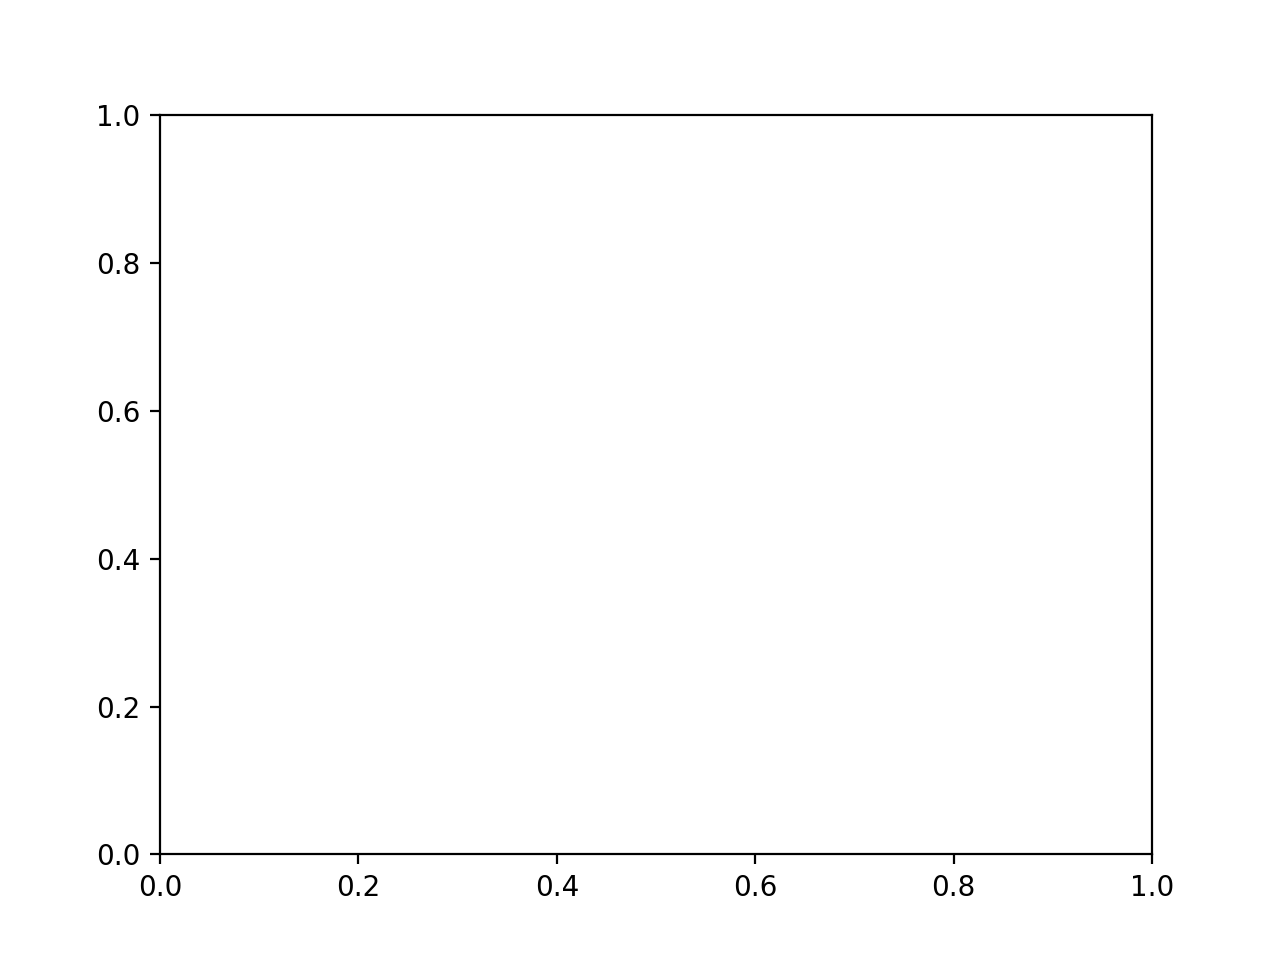

In [39]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
while True:
    try: 
        bit1.append(getBitfinex())
        bit2.append(getBittrex())
        bit3.append(getGdax())
        bit4.append(getBitstamp())
        bit5.append(getBithumb())
    
        ax.clear()
        x_label = np.arange(0., 5., 0.5)
        ax.plot(bit1, x_label, 'r--', bit2, x_label, 'bs', bit3, x_label, 'g^',
                bit4, x_label, 'g--', bit5, x_label, 'y--')
        fig.canvas.draw()
        time.sleep(5)
    except: 
        break


<IPython.core.display.Javascript object>


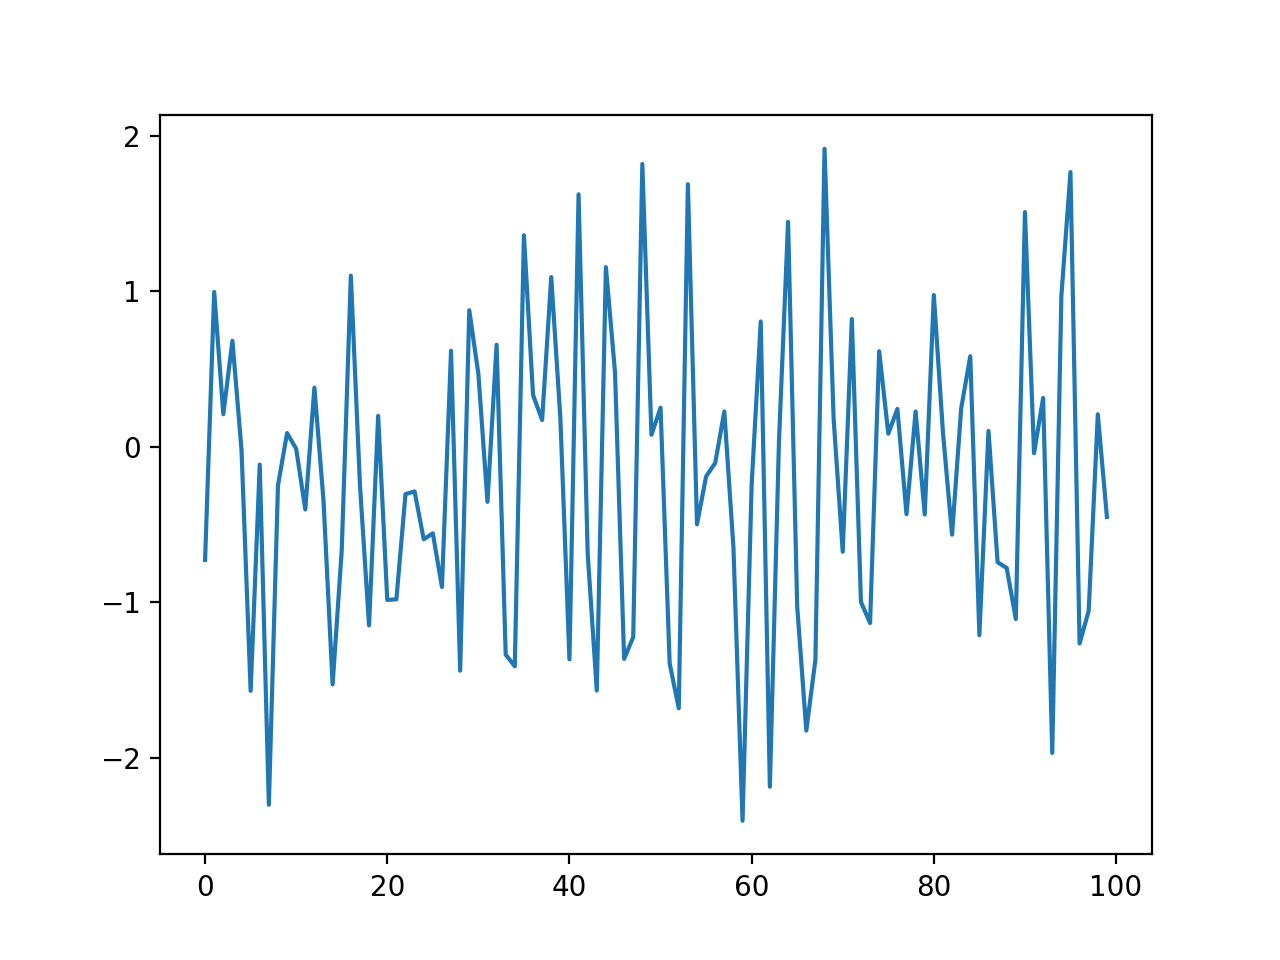

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [26]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(20):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

In [41]:
class Scraper:
    def __init__(self, link):
        self.driver = webdriver.PhantomJS(link)
        
    def getBitfinex(self, st):
        btc_price = 0
        self.driver.delete_all_cookies()
        self.driver.get('https://www.bitfinex.com/stats')
        time.sleep(st)
        html = self.driver.page_source

        soup = BeautifulSoup(html, "lxml")
        lines = soup.findAll('tr')
        flag = 0
        for dl in lines:
            
            if flag == 1:
                break
            cols = dl.find_all('td', {"class":  'col-info'})
            for col in cols:
                if col.get_text() == 'BTC/USD':
                    btc_pl = dl.find('td', {"class":  'col-currency'})
                    btc_price = float(btc_pl.get_text())
                    flag = 1
                    #import pdb; pdb.set_trace()
                    break
        if btc_price == 0:
            raise AttributeError
        return btc_price
    
    def getBittrex(self, st):
        btc_price = 0
        self.driver.delete_all_cookies()
        self.driver.get('https://bittrex.com/home/markets')
        time.sleep(st)
        html = self.driver.page_source

        soup = BeautifulSoup(html, "lxml")
        #import pdb; pdb.set_trace()
        lines = soup.findAll('tr')
        flag = 0
        for dl in lines:
            if flag == 1:
                break
            cols = dl.find_all('td', {"class":  'name visible-lg'})
            for col in cols:
                if col.get_text() == 'Bitcoin':
                    #import pdb; pdb.set_trace()
                    btc_pl = dl.find('td', {"data-bind":  'text: displayLast()'})
                    btc_price = float(btc_pl.get_text())
                    flag = 1
                    break
        if btc_price == 0:
            raise AttributeError
        return btc_price
    
    def getGdax(self, st):
        btc_price = 0
        self.driver.delete_all_cookies()
        self.driver.get('https://www.gdax.com/')
        time.sleep(st)
        html = self.driver.page_source

        soup = BeautifulSoup(html, "lxml")
        #import pdb; pdb.set_trace()
        lines = soup.findAll('li', {"class":  'ProductsList_product_3cAY6'})
        for dl in lines:
            if dl.a.get_text() == 'BTC/USD':
                #import pdb; pdb.set_trace()
                btc_pl = dl.span
                btc_price = float(btc_pl.get_text().replace(",",""))
                break
        if btc_price == 0:
            raise AttributeError
        return btc_price
    
    def getBitstamp(self, st):
        btc_price = 0
        self.driver.delete_all_cookies()
        self.driver.get('https://www.bitstamp.net/')
        time.sleep(st)
        html = self.driver.page_source

        soup = BeautifulSoup(html, "lxml")
        lines = soup.findAll('h3', {"id":  'last-price'})
        #import pdb; pdb.set_trace()
        for dl in lines:
            if dl.attrs['data-pair'] == 'btcusd':
                btc_price = float(dl.strong.get_text())
                break
        if btc_price == 0:
            raise AttributeError
        return btc_price
    
    def getBithumb(self, st):
        url = 'https://api.bithumb.com/public/ticker/btc'
        r = requests.get(url).text
        dt = r.split(",")
        btc_price = float(dt[2].split(':')[1][1:-1]) / 1083.48
        return btc_price
    
    def update(self, name, data_list):
        name_dict = {'getBitfinex': self.getBitfinex, 'getBittrex': self.getBittrex, 
                     'getGdax': self.getGdax, 'getBitstamp': self.getBitstamp, 'getBithumb': self.getBithumb}
        try:
            data_list.append(name_dict[name](1))
        except AttributeError:
            try: 
                data_list.append(name_dict[name](3))
            except:
                data_list.append(name_dict[name][-1])


In [40]:
bit = Scraper('/Users/cyian/Desktop/NYU/FALL2017/DS-GA1007/Project/phantomjs/bin/phantomjs')
bit.update()

UnboundLocalError: local variable 'btc_price' referenced before assignment